# Assignment 1

In [1]:
from lib.roots import fixed_point
from lib.integrate import simpson, gaussian_quadrature
from lib.plotter import plot_function, plot_data
import matplotlib.pyplot as plt
from lib.ode import runge_kutta_4th_order
import math

### 1. Solve $e^{-x} - x = 0$ using the fixed-point method, accurate upto 4 placed in decimal.

In [2]:
def problem_one(x):
    return math.exp(-x) - x


fixed_point(problem_one, 0.5, tol=1e-4, maxiter=1000)

problem_one has a root at 0.5671188642569858.


### 2. Use Simpson’s rule and appropriate Gaussian quadrature to evaluate the following integral accurate up to 6 places in decimal

$$\int_0^1 \sqrt{1+x^4} dx$$

To calculate value within the required tolerance, we can calculate the fourth-order derivative of the given function and then use its maximal value. This will give us the
optimal number of intervals that we have to use.
The derivatives of given function are

$$f'(x) = \dfrac{2x^3}{\sqrt{1+x^4}}$$

$$f''(x) = \dfrac{2x^6 + 6x^2}{(1+x^4)^{3/2}}$$

$$f'''(x) = -\dfrac{12x(x^4 -1)}{(1+x^4)^{5/2}}$$

$$f''''(x) = \dfrac{60x^8 -168x^4 + 12}{(1+x^4)^{7/2}}$$

The maximum value of $f''''(x)$ can be found graphically as shown below:

Minimal value of y: 5.996221072276914e-05
Maximal value of y: 14.06093847425305


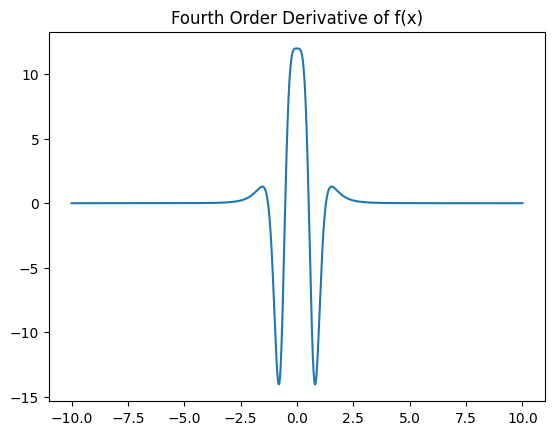

In [3]:
def fourth_order_derivative_problem_two(x):
    return (60*x**8 - 168*x**4 + 12) / (1+x**4)**3.5

plot_function(fourth_order_derivative_problem_two, (-10, 10), 10000, "Fourth Order Derivative of f(x)")



Now we can just use the value as below as we call the `simpson` function.

In [4]:
def problem_two(x):
    return math.sqrt(1 + x**4)


simpson(
    func=problem_two,
    bounds=(0, 1),
    tol=1e-8,
    maximum_value_of_error_func=14.06093847425305,
)

The value of the integral is 1.0894294132234008 with 52 intervals used.


The next step is to use an appropriate Gaussian quadrature to solve the same integral. 
This can be done by changing the limits of integration by using the fact that given function
is even and rewriting the problem as

$$\dfrac{1}{2} \int_{-1}^{1} \sqrt{1 + x^4} dx$$

In [5]:
# gaussian_quadrature(problem_two, (-1, 1))


### 3. Solve the following ODE with RK4 with interval sizes 0.5, 0.2, 0.05 and 0.01

$$\dfrac{dy}{dx} = \dfrac{5x^2-y}{e^{x+y}}$$

### with $y(0) = 1$.

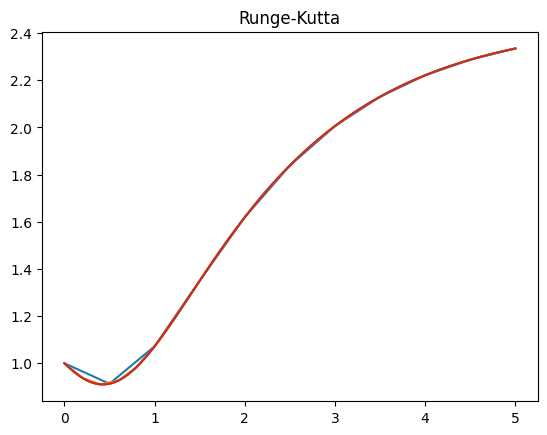

In [6]:
def problem_three(t, y):
    return (5 * t**2 - y) / (math.exp(t + y))

step_sizes = [0.5, 0.2, 0.05, 0.01]
all_t = []
all_y = []
for step_size in step_sizes:
    t, y = runge_kutta_4th_order(func=problem_three, t0=0, y0=1.0, interval=(0, 5), step_size=step_size)
    all_t.append(t)
    all_y.append(y)

for t, y in zip(all_t, all_y):
    plot_data(t, y, title="Runge-Kutta")

plt.show()

### 4. Solve the heat equation $u_t = 4u_xx$, using Crank-Nicolson and your choice of $\alpha$, subjected to the boundary conditions0

$$u(0, t) = 0 = u(8, t)$$
### and
$$x(x, 0) = 4x - \dfrac{x^2}{2}$$

AttributeError: 'list' object has no attribute 'ndim'

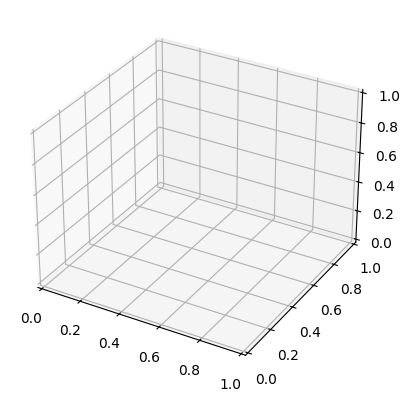

In [9]:
import matplotlib.pyplot as plt

class HeatEquationSolver:
    def __init__(self, L=8, T=1, Nx=100, Nt=1000):
        self.L = L  # Length of the rod
        self.T = T  # Total time
        self.Nx = Nx  # Number of spatial grid points
        self.Nt = Nt  # Number of time steps
        self.dx = L / (Nx - 1)  # Spatial step size
        self.dt = T / Nt  # Time step size
        self.alpha = self.dt / (2 * self.dx)  # Stability parameter

        # Grid
        self.x_values = [i * self.dx for i in range(self.Nx)]
        self.t_values = [n * self.dt for n in range(self.Nt)]

        # Initialize solution matrix
        self.u = [[0] * self.Nx for _ in range(self.Nt)]

    def initial_condition(self, x):
        return 4 * x - 0.5 * x**2

    def boundary_conditions(self, t):
        return 0

    def crank_nicolson(self):
        # Crank-Nicolson method
        A = [[0] * self.Nx for _ in range(self.Nx)]
        for i in range(self.Nx):
            A[i][i] = 2 + 2 * self.alpha
            if i > 0:
                A[i][i - 1] = -self.alpha
            if i < self.Nx - 1:
                A[i][i + 1] = -self.alpha

        for n in range(self.Nt - 1):
            b = [0] * self.Nx
            for i in range(1, self.Nx - 1):
                b[i] = self.u[n][i] + self.alpha * (self.u[n][i+1] - 2 * self.u[n][i] + self.u[n][i-1])
            b[0] = self.boundary_conditions(self.t_values[n + 1])
            b[-1] = self.boundary_conditions(self.t_values[n + 1])
            self.u[n + 1] = self.thomas_algorithm(A, b)

    def thomas_algorithm(self, A, b):
        # Implementation of the Thomas algorithm for solving tridiagonal matrices
        N = len(b)
        c = [0] * (N - 1)
        d = [0] * N
        x = [0] * N

        # Forward elimination
        c[0] = A[0][1] / A[0][0]
        d[0] = b[0] / A[0][0]
        for i in range(1, N - 1):
            m = 1 / (A[i][i] - A[i][i - 1] * c[i - 1])
            c[i] = A[i][i + 1] * m
            d[i] = (b[i] - A[i][i - 1] * d[i - 1]) * m

        # Back substitution
        d[N - 1] = (b[N - 1] - A[N - 1][N - 2] * d[N - 2]) / (A[N - 1][N - 1] - A[N - 1][N - 2] * c[N - 2])
        x[N - 1] = d[N - 1]
        for i in range(N - 2, -1, -1):
            x[i] = d[i] - c[i] * x[i + 1]

        return x

    def solve(self):
        # Apply initial condition
        for i in range(self.Nx):
            self.u[0][i] = self.initial_condition(self.x_values[i])

        # Solve using Crank-Nicolson method
        self.crank_nicolson()

    def plot_solution(self):
        # Convert solution matrix to a 2D array
        U = [[self.u[n][i] for i in range(self.Nx)] for n in range(self.Nt)]
    
        # Plot
        X, T = [], []
        for i in range(self.Nx):
            X.append([self.x_values[i]] * self.Nt)
            T.append(self.t_values)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(X, T, U, cmap='viridis')
        ax.set_xlabel('x')
        ax.set_ylabel('t')
        ax.set_zlabel('u(x,t)')
        ax.set_title('Solution of Heat Equation using Crank-Nicolson Method')
        plt.show()



# Example usage:
solver = HeatEquationSolver()
solver.solve()
solver.plot_solution()
